<h2> General Definitions </h2>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 14)

from sympy import simplify as slf

kx = sp.Symbol('kx', real=True)
ky = sp.Symbol('ky', real=True)
m = sp.Symbol('m', real=True)
i = sp.I

k = sp.sqrt(kx**2 + ky**2)

so = sp.Matrix([[1, 0], [0, 1]])
sx = sp.Matrix([[0, 1], [1, 0]])
sy = sp.Matrix([[0, -i], [i, 0]])
sz = sp.Matrix([[1, 0], [0, -1]])

<h2> Hamiltonian and Energies </h2>

In [2]:
H = kx*sx + ky*sy + m*sz
E = sp.sqrt(k**2 + m**2)

<h3> $\uparrow$-Gauge </h3>
$$
| v_\pm \rangle = | \uparrow \rangle + \frac{k_x + i k_y}{m \pm \sqrt{k^2 + m^2}} | \downarrow \rangle
$$

In [3]:
# Conduction (+ p)
vup_p = sp.Matrix([1, (kx + i*ky)/(m + E)])
vup_pc = sp.Matrix([1, (kx - i*ky)/(m + E)])
# Valence (- m)
vup_m = sp.Matrix([1, (kx + i*ky)/(m - E)])
vup_mc = sp.Matrix([1, (kx - i*ky)/(m - E)])
# Normalisation
nup_p = 1/sp.sqrt(vup_pc.dot(vup_p))
nup_m = 1/sp.sqrt(vup_mc.dot(vup_m))

# Normalised waves
uup_p = nup_p * vup_p
uup_pc = nup_p * vup_pc
uup_m = nup_m * vup_m
uup_mc = nup_m * vup_mc

<h3> $\downarrow$-Gauge </h3>
$$
| v_\pm \rangle = \frac{-k_x + i k_y}{m \mp \sqrt{k^2 + m^2}} | \uparrow \rangle +  | \downarrow \rangle
$$

In [4]:
# Conduction (+ p)
vdo_p = sp.Matrix([(-kx + i*ky)/(m - E), 1])
vdo_pc = sp.Matrix([(-kx - i*ky)/(m - E), 1])
# Valence (- m)
vdo_m = sp.Matrix([(-kx + i*ky)/(m + E), 1])
vdo_mc = sp.Matrix([(-kx - i*ky)/(m + E), 1])
# Norm
ndo_p = 1/sp.sqrt(vdo_pc.dot(vdo_p))
ndo_m = 1/sp.sqrt(vdo_mc.dot(vdo_m))

# Normalised waves
udo_p = ndo_p * vdo_p
udo_pc = ndo_p * vdo_pc
udo_m = ndo_m * vdo_m
udo_mc = ndo_m * vdo_mc

<h3> $\uparrow \downarrow$-Gauge </h3>
$$
| v_+ \rangle = (m + \sqrt{k^2 + m^2}) | \uparrow \rangle + (k_x + i k_y) | \downarrow \rangle \\
| v_- \rangle = (-k_x + i k_y) | \uparrow \rangle + (m + \sqrt{k^2 + m^2}) | \downarrow \rangle
$$

In [5]:
# Conduction (+ p)
vud_p = sp.Matrix([m + E, kx + i*ky])
vud_pc = sp.Matrix([m + E, kx - i*ky])
# Valence (- m)
vud_m = sp.Matrix([-kx + i*ky, m + E])
vud_mc = sp.Matrix([(-kx - i*ky), m + E])
# Norm
nud_p = 1/sp.sqrt(vud_pc.dot(vud_p))
nud_m = 1/sp.sqrt(vud_mc.dot(vud_m))

# Normalised waves
uud_p = nud_p * vud_p
uud_pc = nud_p * vud_pc
uud_m = nud_m * vud_m
uud_mc = nud_m * vud_mc

<h2> Berry connection </h2>

$\nabla_k | u_n \rangle$

In [6]:
# First derivatives
# Up gauge conduction band
dx_uup_p = sp.diff(uup_p, kx)
dy_uup_p = sp.diff(uup_p, ky)
# Up gauge valence band
dx_uup_m = sp.diff(uup_m, kx)
dy_uup_m = sp.diff(uup_m, ky)

# Down gauge conduction band
dx_udo_p = sp.diff(udo_p, kx)
dy_udo_p = sp.diff(udo_p, ky)
# Down gauge valence band
dx_udo_m = sp.diff(udo_m, kx)
dy_udo_m = sp.diff(udo_m ,ky)

# UpDown gauge conduction band
dx_uud_p = sp.diff(uud_p, kx)
dy_uud_p = sp.diff(uud_p, ky)
# UpDown gauge valence band
dx_uud_m = sp.diff(uud_m, kx)
dy_uud_m = sp.diff(uud_m ,ky)

$\mathbf{A}_{nn} = i \langle u_n | \nabla_k | u_n \rangle$

In [7]:
# Up gauge Conduction (+ p) and Valence (- m) band connections
Aup_pp = i * sp.Matrix([uup_pc.dot(dx_uup_p), uup_p.dot(dy_uup_p)])
Aup_mm = i * sp.Matrix([uup_m.dot(dx_uup_m), uup_m.dot(dy_uup_m)])

# Down gauge Conduction (+ p) and Valence (- m) band connections
Ado_pp = i * sp.Matrix([udo_p.dot(dx_udo_p), udo_p.dot(dy_udo_p)])
Ado_mm = i * sp.Matrix([udo_m.dot(dx_udo_m), udo_m.dot(dy_udo_m)])

# UpDown gauge Conduction (+ p) and Valence (- m) band connections
Aud_pp = i * sp.Matrix([uud_p.dot(dx_uud_p), uud_p.dot(dy_uud_p)])
Aud_mm = i * sp.Matrix([uud_m.dot(dx_uud_m), uud_m.dot(dy_uud_m)])

In [8]:
# Functions for evaluating the Up gauge
Aup_pp_f = sp.lambdify(Aup_pp.free_symbols, Aup_pp, "numpy")
Aup_mm_f = sp.lambdify(Aup_mm.free_symbols, Aup_mm, "numpy")

# Functions for evaluating the down gauge
Ado_pp_f = sp.lambdify(Ado_pp.free_symbols, Ado_pp, "numpy")
Ado_mm_f = sp.lambdify(Ado_mm.free_symbols, Ado_mm, "numpy")

# Functions for evaluating the UpDown gauge
Aud_pp_f = sp.lambdify(Aud_pp.free_symbols, Aud_pp, "numpy")
Aud_mm_f = sp.lambdify(Aud_mm.free_symbols, Aud_mm, "numpy")

<h2> Plots </h2>

<h3> Evaluate and normalize </h3>

In [9]:
kinit = np.linspace(-1, 1, 20)
kmat = np.array(np.meshgrid(kinit, kinit)).T.reshape(-1, 2)
kx = kmat[:, 0]
ky = kmat[:, 1]

# Up gauge
Aup_pp_e = np.real(Aup_pp_f(kx=kx, ky=ky, m=0)).reshape(2, -1)
Aup_mm_e = np.real(Aup_mm_f(kx=kx, ky=ky, m=0)).reshape(2, -1)
Nup_pp = np.linalg.norm(Aup_pp_e, axis=0)
Nup_mm = np.linalg.norm(Aup_mm_e, axis=0)
Aup_pp_e /= Nup_pp
Aup_mm_e /= Nup_mm

# Down gauge
Ado_pp_e = np.real(Ado_pp_f(kx=kx, ky=ky, m=0)).reshape(2, -1)
Ado_mm_e = np.real(Ado_mm_f(kx=kx, ky=ky, m=0)).reshape(2, -1)
Ndo_pp = np.linalg.norm(Ado_pp_e, axis=0)
Ndo_mm = np.linalg.norm(Ado_mm_e, axis=0)
Ado_pp_e /= Ndo_pp
Ado_mm_e /= Ndo_mm

# UpDown gauge
Aud_pp_e = np.real(Aud_pp_f(kx=kx, ky=ky, m=0)).reshape(2, -1)
Aud_mm_e = np.real(Aud_mm_f(kx=kx, ky=ky, m=0)).reshape(2, -1)
Nud_pp = np.linalg.norm(Aud_pp_e, axis=0)
Nud_mm = np.linalg.norm(Aud_mm_e, axis=0)
Aud_pp_e /= Nud_pp
Aud_mm_e /= Nud_mm

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


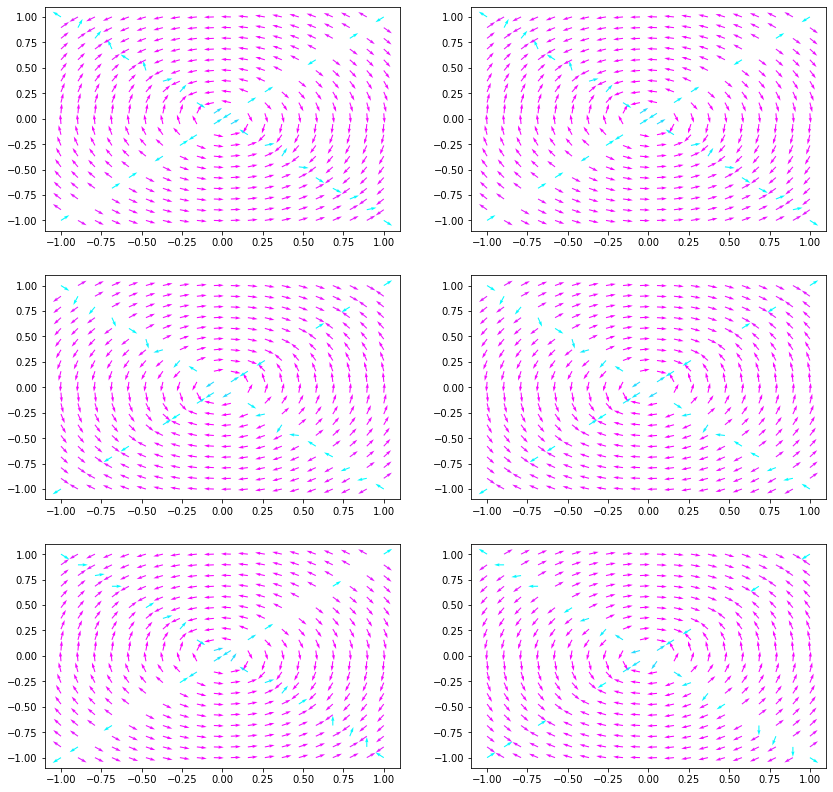

In [10]:
fig, ax = plt.subplots(3, 2)
ax[0, 0].quiver(kx, ky, Aup_pp_e[0, :], Aup_pp_e[1, :], np.log10(Nup_pp), angles='xy', cmap='cool')
ax[0, 1].quiver(kx, ky, Aup_mm_e[0, :], Aup_mm_e[1, :], np.log10(Nup_mm), angles='xy', cmap='cool')
ax[1, 0].quiver(kx, ky, Ado_pp_e[0, :], Ado_pp_e[1, :], np.log10(Ndo_pp), angles='xy', cmap='cool')
ax[1, 1].quiver(kx, ky, Ado_mm_e[0, :], Ado_mm_e[1, :], np.log10(Ndo_mm), angles='xy', cmap='cool')
ax[2, 0].quiver(kx, ky, Aud_pp_e[0, :], Aud_pp_e[1, :], np.log10(Nud_pp), angles='xy', cmap='cool')
ax[2, 1].quiver(kx, ky, Aud_mm_e[0, :], Aud_mm_e[1, :], np.log10(Nud_mm), angles='xy', cmap='cool')